## Trying Searchlight

In [1]:
%matplotlib inline


In [2]:
from nipype.interfaces import afni as afni

import numpy as np
import pandas as pd
import os as os
import re as re
import glob as glob
import nibabel as nibabel
from mvpa2.tutorial_suite import *



In [3]:
### SET Working directory
% cd /Volumes/group/iang/biac3/gotlib7/data/PARC/testingGround/PARC_mvpa/


/Volumes/group/iang/biac3/gotlib7/data/PARC/testingGround/PARC_mvpa


BADALIGN_PARC_sub_2736.LSSbetas.BLOCK6.study.uber.nii* PARC_sub_2874_fs_brain.subj.nii.gz*
PARC_sub_2699.LSSbetas.BLOCK6.study.uber.nii*          PARC_sub_2874_study_timingdata.csv*
PARC_sub_2699.LSSbetas.GAM.test.uber.nii*              PARC_sub_2874_test_timingdata.csv*
PARC_sub_2699.labelVolume.nii.gz*                      PARC_sub_2879.LSSbetas.BLOCK6.study.uber.nii*
PARC_sub_2699.mean_func.r02.nii.gz*                    PARC_sub_2879.LSSbetas.GAM.test.uber.nii*
PARC_sub_2699.parafusi.nii*                            PARC_sub_2879.labelVolume.nii.gz*
PARC_sub_2699_FSPGR_1.nii.gz*                          PARC_sub_2879.mean_func.r02.nii.gz*
PARC_sub_2699_fs_brain.subj.nii.gz*                    PARC_sub_2879.parafusi.nii*

PARC_sub_2699_test_timingdata.csv*                     PARC_sub_2879_fs_brain.subj.nii.gz*
PARC_sub_2718.LSSbetas.BLOCK6.study.uber.nii*          PARC_sub_2879_study_timingdata.csv*
PARC_sub_2718.LSSbetas.GAM.test.uber.nii*              PARC_sub_2879_test_timingdata

In [5]:

study_beta_prefix = 'LSSbetas.BLOCK6.study.uber'
test_beta_prefix = 'LSSbetas.GAM.test.uber'
mask_prefix = 'parafusi'
mask_labels = [1007, 2007, 1016, 2016]
subj = 'PARC_sub_2848'
predDf = pd.DataFrame()
    
    # load behavioral data
study_csv_name = subj + '_study_timingdata.csv'
test_csv_name = subj + '_test_timingdata.csv'
study_data = pd.read_csv(study_csv_name, sep=',')
test_data = pd.read_csv(test_csv_name, sep=',')

# make variables to load neural data
study_labels = list(study_data.imgType)
test_labels = list(test_data.imgType)
trials = np.array(range(1,97))
runs = np.repeat(range(1,7),16, axis= 0)

# load neural data 
print 'loading neural data...' 
study_beta_name = subj + '.' + study_beta_prefix + '.nii'
mask_name = subj + '.' + mask_prefix + '.nii'
# mask_name =  'PARC_sub_2848_wholeMask.nii.g'
test_beta_name = subj + '.' + test_beta_prefix + '.nii'

ds_study = fmri_dataset(samples = study_beta_name, mask = mask_name, chunks= runs, targets=study_labels)
ds_test = fmri_dataset(samples = test_beta_name, mask = mask_name, chunks= runs, targets=test_labels)
zscore(ds_study)
zscore(ds_test)


loading neural data...


In [6]:
### CV TEST

clf = LinearCSVMC(C=-1)
cv = CrossValidation(clf, NFoldPartitioner())


In [7]:
sl = sphere_searchlight(cv, radius=12, postproc=mean_sample())

In [8]:
res = sl(ds_study)

In [9]:
sphere_errors = res.samples[0]
res_mean = np.mean(res)
res_std = np.std(res)

chance_level = 1.0 - (1.0 / len(ds_study.uniquetargets))
frac_lower = np.round(np.mean(sphere_errors < chance_level - 2 * res_std), 3)

In [13]:
frac_lower

1.0

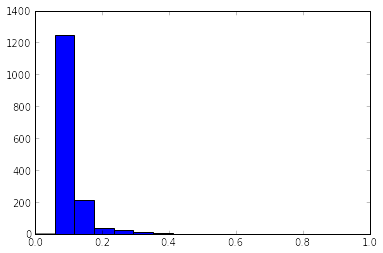

In [14]:
hist(sphere_errors, bins=np.linspace(0, 1, 18))

In [12]:
map2nifti(ds_study, 1.0 - sphere_errors).to_filename('PARC_sub_2848_paraFusi_Searchlight.nii.gz')

now try notebook w/ whole brain

In [16]:


study_beta_prefix = 'LSSbetas.BLOCK6.study.uber'
test_beta_prefix = 'LSSbetas.GAM.test.uber'
mask_prefix = 'parafusi'
mask_labels = [1007, 2007, 1016, 2016]
subj = 'PARC_sub_2848'
predDf = pd.DataFrame()
    
    # load behavioral data
study_csv_name = subj + '_study_timingdata.csv'
test_csv_name = subj + '_test_timingdata.csv'
study_data = pd.read_csv(study_csv_name, sep=',')
test_data = pd.read_csv(test_csv_name, sep=',')

# make variables to load neural data
study_labels = list(study_data.imgType)
test_labels = list(test_data.imgType)
trials = np.array(range(1,97))
runs = np.repeat(range(1,7),16, axis= 0)

# load neural data 
print 'loading neural data...' 
study_beta_name = subj + '.' + study_beta_prefix + '.nii'
mask_name = subj + '.' + mask_prefix + '.nii'
mask_name =  'PARC_sub_2848_anatMask.nii'
test_beta_name = subj + '.' + test_beta_prefix + '.nii'

ds_study = fmri_dataset(samples = study_beta_name, mask = mask_name, chunks= runs, targets=study_labels)
ds_test = fmri_dataset(samples = test_beta_name, mask = mask_name, chunks= runs, targets=test_labels)
zscore(ds_study)
zscore(ds_test)


loading neural data...


In [17]:
clf = LinearCSVMC(C=-1)
cv = CrossValidation(clf, NFoldPartitioner())
sl = sphere_searchlight(cv, radius=12, postproc=mean_sample())

In [21]:
res = sl(ds_study)

KeyboardInterrupt: 

In [22]:
sphere_errors = res.samples[0]
res_mean = np.mean(res)
res_std = np.std(res)

chance_level = 1.0 - (1.0 / len(ds_study.uniquetargets))
frac_lower = np.round(np.mean(sphere_errors < chance_level - 2 * res_std), 3)

In [26]:
chance_level

0.5

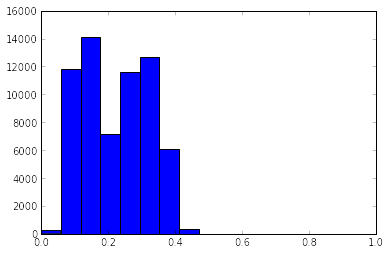

In [23]:
hist(sphere_errors, bins=np.linspace(0, 1, 18))

In [24]:
map2nifti(ds_study, 1.0 - sphere_errors).to_filename('PARC_sub_2848_WholeBrain_r12_Searchlight.nii.gz')

In [25]:
pwd

u'/Volumes/group/iang/biac3/gotlib7/data/PARC/testingGround/PARC_mvpa'